In [1]:
using Plots, Flux, Zygote, ForwardDiff, TaylorDiff, SliceMap

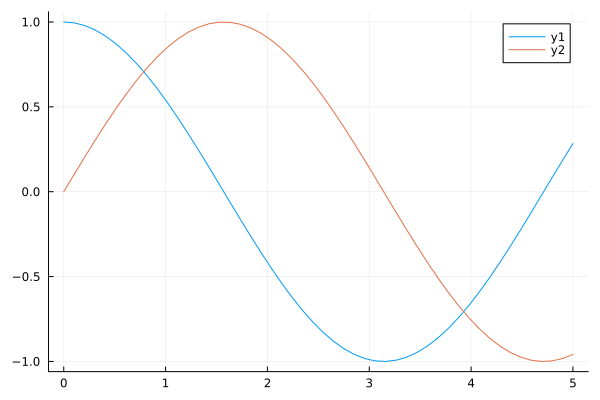

In [5]:
x = collect(range(0f0, 5f0, length=50))
f(x) = sin.(x) 
#dydx = Zygote.gradient(x -> sum(f(x)), x)[1]
#x = convert(Vector{Float32}, x)
dydx = TaylorDiff.derivative.(f, x, Float32.(ones(size(x))), Val(1))

plot(x, dydx)
plot!(x, sin.(x))

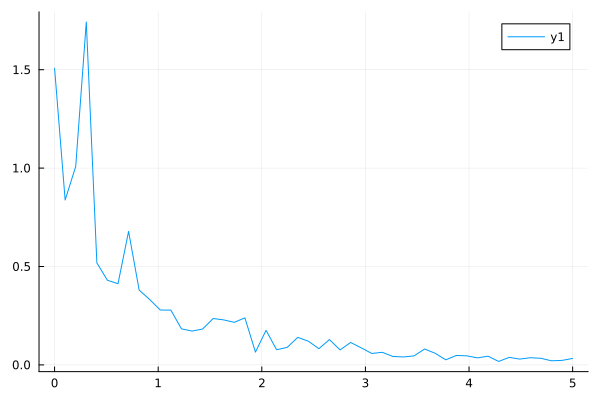

In [80]:
using Flux
using TaylorSeries
using TaylorDiff

# Define the custom activation function
function custom_relu(x)
    max(0, x)
end

# Define the Dense layer manually
function dense_layer(x, W, b, activation)
    return activation.(W * x .+ b)
end

# Define the model manually
function custom_model(x)
    # First layer
    W1 = rand(Float32, 10, 1)
    b1 = rand(Float32, 10)
    x = dense_layer(x, W1, b1, atan)
    
    # Second layer
    W2 = rand(Float32, 10, 10)
    b2 = rand(Float32, 10)
    x = dense_layer(x, W2, b2, atan)
    
    # Third layer
    W3 = rand(Float32, 1, 10)
    b3 = rand(Float32, 1)
    x = dense_layer(x, W3, b3, identity)
    
    return x
end

# Define the input
x = Float32.(collect(range(0, 5, length=50)))'

# Define the function to be differentiated
f(x) = custom_model.(x)[1]

# Compute the derivative
dydx = TaylorDiff.derivative.(f, x, Val(1))

plot(x', dydx')

In [82]:
model = Chain(Dense(1 => 30, relu), Dense(30 => 30, relu), Dense(30 => 1))
model(x)

1×50 Matrix{Float32}:
 0.0  -0.0160634  -0.0321268  -0.0481902  …  -0.75498  -0.771043  -0.787107

In [84]:
custom_model.(x)[1]

1×1 Matrix{Float32}:
 4.503542

In [29]:
using Lux, Random
#Network Setup 
model_ = Chain(
    Dense(1, 10, relu),
    Dense(10, 10, relu),
    Dense(10, 1)
) 
 
rng = MersenneTwister()
Random.seed!(rng, 1)

 
x = Float64.(collect(range(0, 5, length=50)))'
model_(x) 
 

MethodError: MethodError: no method matching (::Chain{@NamedTuple{layer_1::Dense{typeof(relu), Int64, Int64, Nothing, Nothing, Static.True}, layer_2::Dense{typeof(relu), Int64, Int64, Nothing, Nothing, Static.True}, layer_3::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}}, Nothing})(::LinearAlgebra.Adjoint{Float64, Vector{Float64}})
The object of type `Chain{@NamedTuple{layer_1::Dense{typeof(relu), Int64, Int64, Nothing, Nothing, Static.True}, layer_2::Dense{typeof(relu), Int64, Int64, Nothing, Nothing, Static.True}, layer_3::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}}, Nothing}` exists, but no method is defined for this combination of argument types when trying to treat it as a callable object.

Closest candidates are:
  (::Chain)(::Any, !Matched::Any, !Matched::NamedTuple)
   @ Lux ~/.julia/packages/Lux/CXGnc/src/layers/containers.jl:480
  (::AbstractLuxWrapperLayer{layer})(::Any, !Matched::Any, !Matched::Any) where layer
   @ LuxCore ~/.julia/packages/LuxCore/GlbG3/src/LuxCore.jl:265
